In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier


In [11]:
train_df = pd.read_csv('data.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
1,LP001385,Male,No,0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,Y
2,LP001926,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
3,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
4,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y


In [12]:
train_df.shape

(430, 13)

In [13]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    float64
 2   Married            427 non-null    float64
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 43.8+ KB


In [14]:
train_df.isna().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           14
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term      8
Credit_History       36
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
train_df = train_df.dropna()
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
train_df.shape

(335, 13)

In [17]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((335, 5), (335,))

In [18]:
X.head()

,Gender,Married,ApplicantIncome,LoanAmount,Credit_History
0,0.0,1.0,6700,230.0,1.0
1,0.0,0.0,5316,136.0,1.0
2,0.0,1.0,3704,120.0,1.0
3,0.0,1.0,5821,144.0,1.0
5,0.0,1.0,3052,100.0,1.0


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state=5)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [21]:
from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
accuracy_score(y_val, pred_val)

0.7313432835820896

In [22]:
model.score(X_train, y_train)

0.8134328358208955

# MLFLOW

In [17]:
# !pip install mlflow


In [5]:
import mlflow

In [23]:
# create or set an experiment - (per project)
mlflow.set_experiment("Loan app")

<Experiment: artifact_location='file:c:/Scaler/MLOPS/Day-8/Experiment_Tracking/mlruns/1', creation_time=1766653564744, experiment_id='1', last_update_time=1766653564744, lifecycle_stage='active', name='Loan app', tags={}>

In [24]:
# Start an MLflow run


with mlflow.start_run():
    model = RandomForestClassifier(max_depth=4, random_state=5)
    model.fit(X_train, y_train)
    
    train_acc = model.score(X_train, y_train)
    val_acc = model.score(X_val, y_val)

    mlflow.set_tag('mlflow.runName', 'first_run')

    # Log parameters
    mlflow.log_param("max_depth", 4)
    mlflow.log_metric("train_accuracy", train_acc)
    mlflow.log_metric("val_accuracy", val_acc)

    # Log the model
    mlflow.sklearn.log_model(model, "my_model_RandomForestClassifier")

2025/12/25 14:47:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [28]:
!mlflow ui --port 5555


^C


In [29]:
# Start an MLflow run
with mlflow.start_run():
    model = RandomForestClassifier(max_depth=6, random_state=5)
    model.fit(X_train, y_train)
    
    train_acc = model.score(X_train, y_train)
    val_acc = model.score(X_val, y_val)

    mlflow.set_tag('mlflow.runName', 'second_run')

    # Log parameters
    mlflow.log_param("max_depth", 6)
    mlflow.log_metric("train_accuracy", train_acc)
    mlflow.log_metric("val_accuracy", val_acc)

    # Log the model
    mlflow.sklearn.log_model(model, "my_model")

2025/12/25 15:09:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [31]:
!mlflow ui --port 50000


^C


In [32]:
def mlflow_runs(n_est, max_deep, i):
    # Start an MLflow run
    with mlflow.start_run():
        model = RandomForestClassifier(max_depth=max_deep, n_estimators=n_est, random_state=5)
        model.fit(X_train, y_train)
        
        train_acc = model.score(X_train, y_train)
        val_acc = model.score(X_val, y_val)


        run = "hyperparam_run_" + str(i)

        mlflow.set_tag('mlflow.runName', run)

        # Log parameters
        mlflow.log_param("max_depth", max_deep)
        mlflow.log_param("n_estimators", n_est)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("val_accuracy", val_acc)

        # Log the model
        mlflow.sklearn.log_model(model, "my_model")

In [33]:
mlflow_runs(10, 2, 1)
mlflow_runs(20, 2, 2)
mlflow_runs(40, 2, 3)
mlflow_runs(10, 4, 4)
mlflow_runs(20, 4, 5)
mlflow_runs(40, 4, 6)
mlflow_runs(10, 8, 7)
mlflow_runs(20, 8, 8)
mlflow_runs(40, 8, 9)

2025/12/25 16:38:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/25 16:38:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/25 16:38:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/25 16:38:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/25 16:39:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/25 16:39:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/25 16:39:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/25 16:39:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/25 16:39:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [34]:
!mlflow ui --port 50000

^C


# New Data

In [35]:
train_df = pd.read_csv('data_new.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
train_df.shape

(614, 13)

In [37]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

train_df = train_df.dropna()

In [38]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((480, 5), (480,))

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

In [40]:
# Start an MLflow run
with mlflow.start_run():
    model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=5)
    model.fit(X_train, y_train) # new data..
    
    train_acc = model.score(X_train, y_train)
    val_acc = model.score(X_val, y_val)

    mlflow.set_tag('mlflow.runName', 'new_data_run')
    mlflow.set_tag('training_info', 'data collection')

    # Log parameters
    mlflow.log_param("max_depth", 6)
    mlflow.log_param("n_estimators", 100)
    mlflow.log_metric("train_accuracy", train_acc)
    mlflow.log_metric("val_accuracy", val_acc)

    # Log the model
    mlflow.sklearn.log_model(model, "my_model")

2025/12/25 17:01:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [41]:
!mlflow ui --port 50000

^C


# New Model

In [42]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

Matplotlib is building the font cache; this may take a moment.


2025/12/25 17:20:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


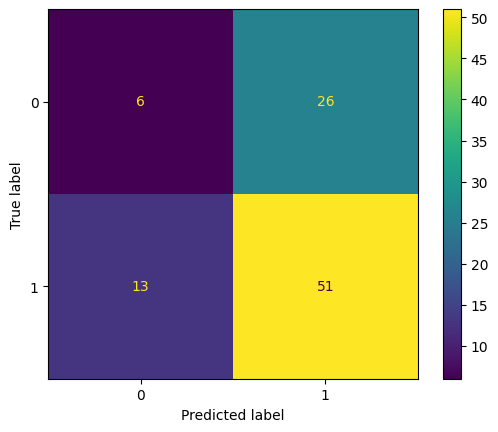

In [43]:
# Start an MLflow run
with mlflow.start_run():

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train) # new data..
    
    train_acc = model.score(X_train, y_train)
    val_acc = model.score(X_val, y_val)

    mlflow.set_tag('mlflow.runName', 'kNN')

    # Log parameters
    mlflow.log_param("n_neighbors", 5)
    mlflow.log_metric("train_accuracy", train_acc)
    mlflow.log_metric("val_accuracy", val_acc)

    cm = ConfusionMatrixDisplay.from_estimator(model, X_val, y_val)
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Log the model
    mlflow.sklearn.log_model(model, "my_model")

In [44]:
!mlflow ui --port 50000

^C
